Lista de cosas por hacer:
- [ ] Más análisis
    - [x] Riqueza léxica
    - [x] Que palabras prefieren
    - [ ] Longitud media de frases
    - [x] Longitud media de palabras
    - [x] De todos los textos leidos, que palabras aparecen más, cuáles menos y en que tipo son más frecuentes.(ToDo: Está a medias)
- [ ] Dividir dataset en 60/20/20 variados
- [ ] Entrenarlo y evaluar su capacidad de deteccion

Comienzo de la práctica

# AI vx Human 

## Index

## Data pre-processing and required imports

In [1]:
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd #procesado del csv pasa E/S
import matplotlib as plt #printeo
import random #operaciones matematicas
from metodos import * #importamos metodos para una mayor legibilidad

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os 
for dirname, _, filenames in os.walk('/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/Temas.txt
/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/notebook_final.ipynb
/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/metodos.py
/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/archive/AI_Human.csv
/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/.ipynb_checkpoints/notebook_final-checkpoint.ipynb
/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/__pycache__/metodos.cpython-310.pyc


In [3]:
path_Ruben = '/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/archive/AI_Human.csv'
datos = pd.read_csv(path_Ruben)
datos.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [4]:
datos_totales = (datos['generated']).count()
datos_humanos = (datos['generated'] == 0.0).sum()
print("Datos totales: ", datos_totales)
print("Humanos: ", datos_humanos)
print("IA: ", datos_totales - datos_humanos)

Datos totales:  487235
Humanos:  305797
IA:  181438


In [5]:
# token = nltk.word_tokenize(datos['text'][0])
# nltk.pos_tag(token)

### Selection of the tokens

The selection of the AI and human tokens was made using randon numbers in order to get the most fair sample of data.

In [6]:
tokens_ia = []
tokens_human = []

limit = 1000
while True:
    valor = random.randint(0, len(datos['text']))
    token = nltk.word_tokenize(datos['text'][valor])

    if datos['generated'][valor] == 1.0 and len(tokens_ia)<limit:
        tokens_ia.append(token)
    elif datos['generated'][valor] == 0.0 and len(tokens_human)<limit:
        tokens_human.append(token)
    if len(tokens_ia) == limit and len(tokens_human) == limit:
        break

print("AI: ", len(tokens_ia))
print("Human: ", len(tokens_human))


AI:  1000
Human:  1000


## Lexical Richness

### AI lexical richness

In [7]:
medium_richness_ia = 0
num = 0

for i in range(0, len(tokens_ia)):
    medium_richness_ia += lexical_richness(tokens_ia[i])
    num += 1
medium_richness_ia = medium_richness_ia/num
medium_richness_ia

0.45421116909715664

### Human lexical richness

In [8]:
medium_richness_human = 0
num = 0

for i in range(0, len(tokens_human)):
    #print(i, tokens_human[i])
    medium_richness_human = lexical_richness(tokens_human[i])+medium_richness_human
    num += 1


medium_richness_human = medium_richness_human/num
medium_richness_human

0.43128751920096686

We're going to chech the performance and we're gonna display the accuracy of the tagged words

In [9]:
tagged_sents = tokens_ia

def pos_tagged_words(tagged_sents):
    tagged_words = []
    for sent in tagged_sents:
        for word in sent:
            tagged_words.append(word)
    return tagged_words

tagged_words = pos_tagged_words(tagged_sents)
tagged_words

['``',
 'The',
 'Facial',
 'Action',
 'Coding',
 'System',
 '(',
 'FACS',
 ')',
 ',',
 'a',
 'revolutionary',
 'technology',
 'for',
 'decoding',
 'human',
 'emotions',
 ',',
 'has',
 'sparked',
 'a',
 'debate',
 'about',
 'its',
 'application',
 'in',
 'the',
 'realm',
 'of',
 'education',
 '.',
 'However',
 ',',
 'upon',
 'careful',
 'consideration',
 ',',
 'it',
 'becomes',
 'apparent',
 'that',
 'the',
 'potential',
 'drawbacks',
 'of',
 'this',
 'technology',
 'far',
 'outweigh',
 'any',
 'perceived',
 'benefits',
 '.',
 'In',
 'this',
 'essay',
 ',',
 'I',
 'will',
 'argue',
 'against',
 'the',
 'use',
 'of',
 'FACS',
 'to',
 'read',
 'emotional',
 'expressions',
 'of',
 'students',
 'in',
 'a',
 'classroom',
 'setting',
 '.',
 'My',
 'arguments',
 'are',
 'grounded',
 'in',
 'the',
 'privacy',
 'concerns',
 ',',
 'practical',
 'and',
 'financial',
 'constraints',
 ',',
 'and',
 'the',
 'redundancy',
 'of',
 'this',
 'technology',
 'in',
 'the',
 'face',
 'of',
 'human-centric',


### Finding the most common words

### Most common human words

In [10]:
list =[]
for i in range(len(tokens_human)):
    for w in tokens_human[i]:
        list.append(w.lower())
    
fdist_human = nltk.FreqDist(list)
fdist_human.most_common(20)


[('.', 20025),
 ('the', 19836),
 (',', 15688),
 ('to', 14362),
 ('a', 10048),
 ('and', 9438),
 ('of', 8019),
 ('that', 7194),
 ('in', 6975),
 ('is', 6569),
 ('it', 5951),
 ('you', 5654),
 ('they', 4623),
 ('be', 4519),
 ('for', 4423),
 ('have', 4051),
 ('are', 3788),
 ('i', 3412),
 ('not', 3201),
 ('on', 3124)]

### Most common AI words

In [11]:
list =[]
for i in range(len(tokens_ia)):
    for w in tokens_ia[i]:
        list.append(w.lower())
    
fdist_ia = nltk.FreqDist(list)
fdist_ia.most_common(20)

[(',', 20654),
 ('.', 17396),
 ('the', 14478),
 ('and', 11762),
 ('to', 11158),
 ('of', 8345),
 ('a', 7930),
 ('in', 6321),
 ('that', 5035),
 ('is', 4439),
 ('for', 3895),
 ('can', 3848),
 ('it', 3778),
 ('are', 2734),
 ('be', 2655),
 ('on', 2561),
 ('this', 2477),
 ('their', 2431),
 ('i', 2414),
 ('as', 2134)]

### Removing the sortest and more "useless" words from a linguistic point of view

In [12]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string

stop_words = set(stopwords.words('english'))

filtered_tok_ia = []

for token_list in tokens_ia:
    for token in token_list:

        token = token.lower()
        
        token = token.translate(str.maketrans('', '', string.punctuation))

        if token and token not in stop_words:
            filtered_tok_ia.append(token)

fdist_ia = FreqDist(filtered_tok_ia)
print ("AI")
fdist_ia.most_common(20)

AI


[('students', 2029),
 ('people', 1449),
 ('also', 1261),
 ('like', 1168),
 ('electoral', 1059),
 ('may', 1017),
 ('help', 1004),
 ('college', 971),
 ('important', 942),
 ('school', 920),
 ('time', 893),
 ('make', 881),
 ('one', 851),
 ('car', 816),
 ('would', 793),
 ('could', 754),
 ('cars', 727),
 ('states', 722),
 ('life', 719),
 ('many', 653)]

In [13]:

stop_words = set(stopwords.words('english'))

filtered_tok_human = []

for token_list in tokens_human:
    for token in token_list:

        token = token.lower()
        
        token = token.translate(str.maketrans('', '', string.punctuation))

        if token and token not in stop_words:
            filtered_tok_human.append(token)

fdist_human = FreqDist(filtered_tok_human)
print ("Human")
freq_reduced = fdist_human.most_common(20)


Human


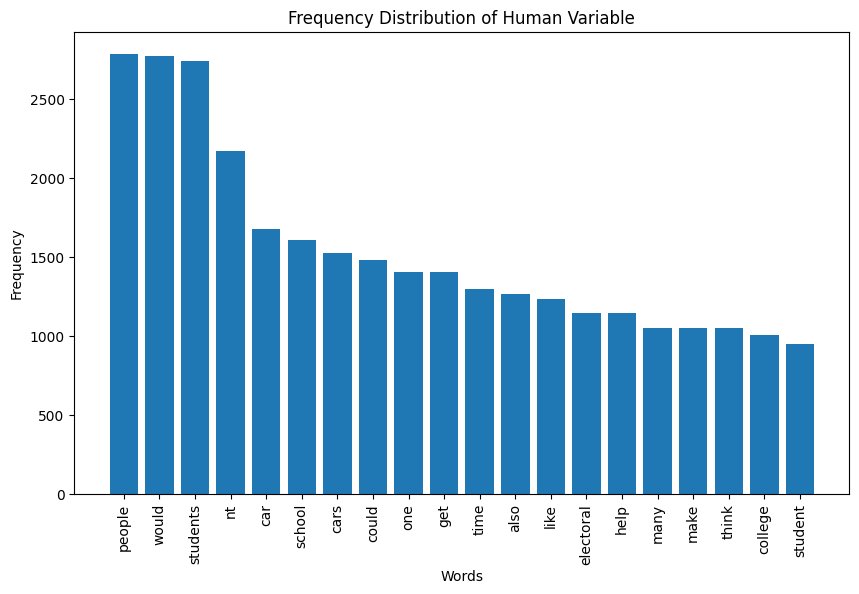

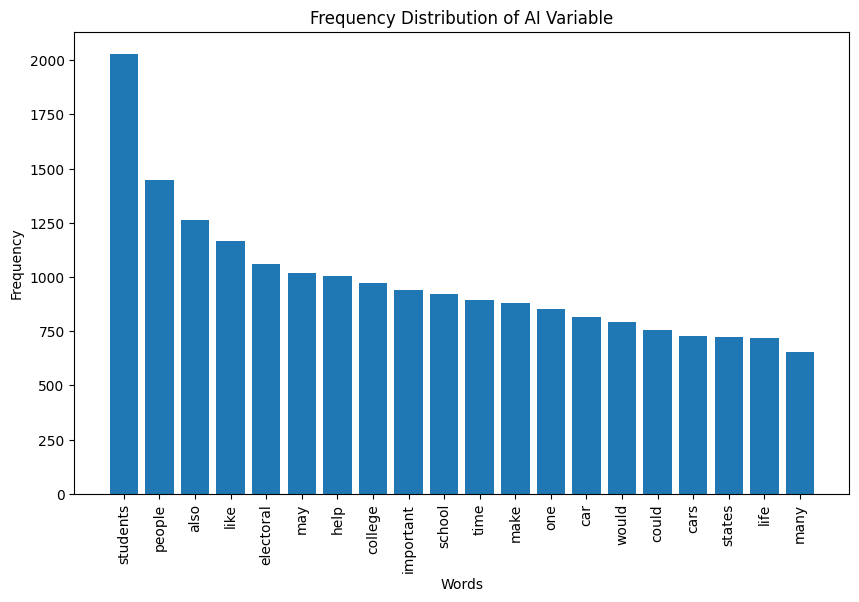

In [16]:


# Plotting the fdist of the human variable

displayWordFreq(fdist_human, 20, True)

displayWordFreq(fdist_ia, 20, False)

# # Plotting the fdist of the AI variable
# freq_reduced_ia = fdist_ia.most_common(20)
# plt.figure(figsize=(10, 6))
# plt.bar(range(len(freq_reduced_ia)), [count for word, count in freq_reduced_ia], align='center')
# plt.xticks(range(len(freq_reduced_ia)), [word for word, count in freq_reduced_ia], rotation=90)
# # plt.bar(range(len(fdist_ia)), [count for word, count in fdist_ia.items()], align='center')
# # plt.xticks(range(len(fdist_ia)), [word for word, count in fdist_ia.items()], rotation=90)
# plt.xlabel('Words')
# plt.ylabel('Frequency')
# plt.title('Frequency Distribution of AI Variable')
# plt.show()